In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据处理

## 1. 百度指数数据处理

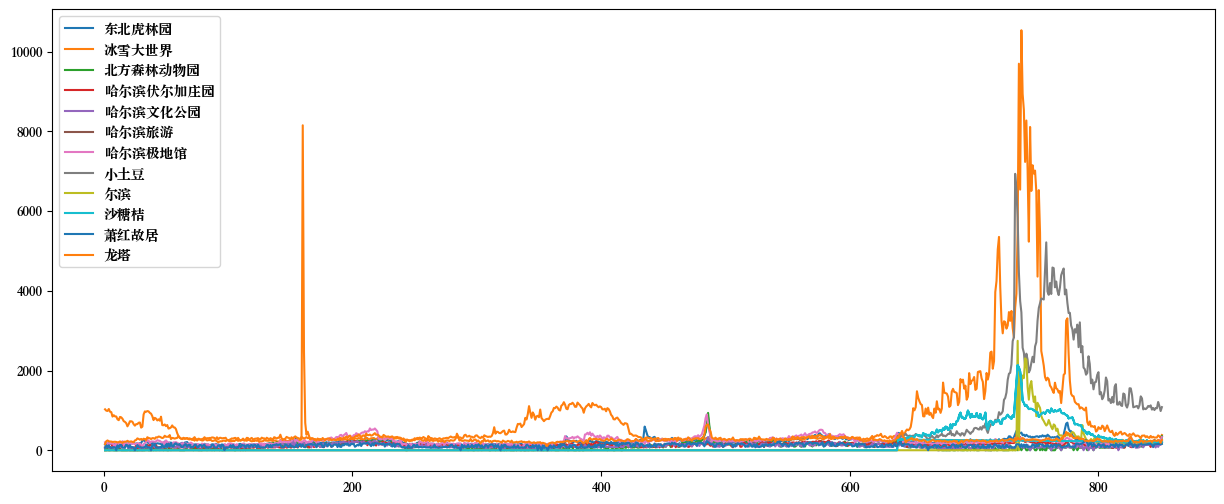

In [2]:
# 读取csv文件 画3折线图

# utf-8-dom
file_path = './baidu.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig') 


plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.figure(figsize=(15, 6))
# 第一列关键词，第二列日期，第5列数据
# 对关键词进行分组，然后为每个关键词绘制一条线

for keyword, group in df.groupby('关键词'):
    filtered_group = group[group['关键词'] != '哈尔滨旅游']
    plt.plot(filtered_group['date'], filtered_group['PC+移动端'], label=keyword)

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [3]:
# 删除无用数据
df.drop(columns=['城市', '省份'], inplace=True)

In [4]:
# Calculate the sum of "PC+移动端" "PC端" "移动端" in each date
grouped_data = df.groupby('date').sum().reset_index()

grouped_data['关键词'] = '全部词条'
grouped_data['日期'] = df['日期'].unique()

# 拼接两个dataframe
df = pd.concat([df, grouped_data])


print(df)


     date    关键词        日期  PC+移动端   PC端   移动端
0       1  哈尔滨旅游  20220101     217    66   151
1       2  哈尔滨旅游  20220102     239    74   165
2       3  哈尔滨旅游  20220103     247    63   184
3       4  哈尔滨旅游  20220104     258    93   165
4       5  哈尔滨旅游  20220105     252   104   148
..    ...    ...       ...     ...   ...   ...
846   847   全部词条  20240426    4191  1094  3097
847   848   全部词条  20240427    4591   812  3779
848   849   全部词条  20240428    4937  1199  3738
849   850   全部词条  20240429    4226  1098  3128
850   851   全部词条  20240430    4951  1154  3797

[11276 rows x 6 columns]


In [5]:
# 滑动平均数据

# 昨日数据
df['pre_hot'] = df['PC+移动端'].shift(1)

# 5日滑动平均
df['ma5_hot'] = df['PC+移动端'].rolling(5).mean()

# 10日滑动平均
df['ma10_hot'] = df['PC+移动端'].rolling(10).mean()
  
has_nan = df.isna().any().any()
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
print(has_nan)


df.to_csv('./baidu_simple.csv', index=False, encoding='utf-8-sig')

   date    关键词        日期  PC+移动端  PC端  移动端  pre_hot  ma5_hot  ma10_hot
0     1  哈尔滨旅游  20220101     217   66  151      NaN      NaN       NaN
1     2  哈尔滨旅游  20220102     239   74  165    217.0      NaN       NaN
2     3  哈尔滨旅游  20220103     247   63  184    239.0      NaN       NaN
3     4  哈尔滨旅游  20220104     258   93  165    247.0      NaN       NaN
4     5  哈尔滨旅游  20220105     252  104  148    258.0    242.6       NaN
5     6  哈尔滨旅游  20220106     241   78  163    252.0    247.4       NaN
6     7  哈尔滨旅游  20220107     243   78  165    241.0    248.2       NaN
7     8  哈尔滨旅游  20220108     228   68  160    243.0    244.4       NaN
8     9  哈尔滨旅游  20220109     225   74  151    228.0    237.8       NaN
True


## 2. 气候数据处理

原始数据必须有先手动导入date

In [6]:
file_path = './hrb_weather.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 处理气温数据
df['最高温'] = df['最高温'].str.replace('°', '').astype(float)
df['最低温'] = df['最低温'].str.replace('°', '').astype(float)

print(df)

     date             日期   最高温   最低温     天气   风力风向  空气质量指数
0       1  2022-01-01 周六 -13.0 -23.0     阵雪  东南风2级  107 轻度
1       2  2022-01-02 周日 -11.0 -22.0      晴  西南风3级    55 良
2       3  2022-01-03 周一 -11.0 -21.0   多云~晴  西南风2级    52 良
3       4  2022-01-04 周二 -14.0 -22.0     多云  西南风2级    80 良
4       5  2022-01-05 周三  -9.0 -22.0  多云~阵雪   南风2级    94 良
..    ...            ...   ...   ...    ...    ...     ...
846   847  2024-04-26 周五  17.0   8.0   阴~多云  西北风3级    37 优
847   848  2024-04-27 周六  16.0   4.0   阴~多云  西北风3级    39 优
848   849  2024-04-28 周日  13.0   2.0    阴~晴   北风3级    48 优
849   850  2024-04-29 周一  14.0   5.0   阴~多云  东北风2级    69 良
850   851  2024-04-30 周二  18.0   7.0    阴~晴  西南风2级    68 良

[851 rows x 7 columns]


In [7]:
# Define the mapping dictionary
weather_mapping = {'晴': 1, '多云': 2, '阴': 3, '雾':4, '小雨':5, '阵雨':5, '雨': 6, '中雨':6, '大雨':7, '雷阵雨':8, '暴雨':8,
                   '雨夹雪':11, '冻雨':12,'小雪': 13, '阵雪':14, '中雪':15, '大雪':16, '暴雪':17}

# Split the "天气" column into two columns
df[['天气1', '天气2']] = df['天气'].str.split('~', expand=True)
# Fill the missing values in the "天气2" column with the values in the "天气1" column
df['天气2'] = df['天气2'].fillna(df['天气1'])
df = df.drop('天气', axis=1)

# Replace the values with numbers using the mapping dictionary
df['天气1'] = df['天气1'].map(weather_mapping).astype(int)
df['天气2'] = df['天气2'].map(weather_mapping).astype(int)

print(df)


has_nan = df.isna().any().any()
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
print(has_nan)

     date             日期   最高温   最低温   风力风向  空气质量指数  天气1  天气2
0       1  2022-01-01 周六 -13.0 -23.0  东南风2级  107 轻度   14   14
1       2  2022-01-02 周日 -11.0 -22.0  西南风3级    55 良    1    1
2       3  2022-01-03 周一 -11.0 -21.0  西南风2级    52 良    2    1
3       4  2022-01-04 周二 -14.0 -22.0  西南风2级    80 良    2    2
4       5  2022-01-05 周三  -9.0 -22.0   南风2级    94 良    2   14
..    ...            ...   ...   ...    ...     ...  ...  ...
846   847  2024-04-26 周五  17.0   8.0  西北风3级    37 优    3    2
847   848  2024-04-27 周六  16.0   4.0  西北风3级    39 优    3    2
848   849  2024-04-28 周日  13.0   2.0   北风3级    48 优    3    1
849   850  2024-04-29 周一  14.0   5.0  东北风2级    69 良    3    2
850   851  2024-04-30 周二  18.0   7.0  西南风2级    68 良    3    1

[851 rows x 8 columns]
Empty DataFrame
Columns: [date, 日期, 最高温, 最低温, 风力风向, 空气质量指数, 天气1, 天气2]
Index: []
False


In [8]:
# 将风力风向分离
df[['风向', '风力']] = df['风力风向'].str.split('风', expand=True)
df = df.drop('风力风向', axis=1)

# Define the mapping dictionary
wind_mapping = {'北':1, '东北':2, '东':3, '东南':4, '南':5, '西南':6, '西':7, '西北':8}

# Replace the values with numbers using the mapping dictionary
df['风向'] = df['风向'].map(wind_mapping).astype(int)
df['风力'] = df['风力'].str.replace('级', '').astype(int)

print(df)

     date             日期   最高温   最低温  空气质量指数  天气1  天气2  风向  风力
0       1  2022-01-01 周六 -13.0 -23.0  107 轻度   14   14   4   2
1       2  2022-01-02 周日 -11.0 -22.0    55 良    1    1   6   3
2       3  2022-01-03 周一 -11.0 -21.0    52 良    2    1   6   2
3       4  2022-01-04 周二 -14.0 -22.0    80 良    2    2   6   2
4       5  2022-01-05 周三  -9.0 -22.0    94 良    2   14   5   2
..    ...            ...   ...   ...     ...  ...  ...  ..  ..
846   847  2024-04-26 周五  17.0   8.0    37 优    3    2   8   3
847   848  2024-04-27 周六  16.0   4.0    39 优    3    2   8   3
848   849  2024-04-28 周日  13.0   2.0    48 优    3    1   1   3
849   850  2024-04-29 周一  14.0   5.0    69 良    3    2   2   2
850   851  2024-04-30 周二  18.0   7.0    68 良    3    1   6   2

[851 rows x 9 columns]


In [9]:
# 将空气质量指数拆分质量和指数
df[['空气质量', '质量等级']] = df['空气质量指数'].str.split(' ', expand=True)

# Define the mapping dictionary
air_quality_mapping = {'优':1, '良':2, '轻度':3, '中度':4, '重度':5, '严重':6}
df.drop('空气质量指数', axis=1, inplace=True)

# Replace the values with numbers using the mapping dictionary
df['空气质量'] = df['空气质量']
df['质量等级'] = df['质量等级'].map(air_quality_mapping)


print(df)

     date             日期   最高温   最低温  天气1  天气2  风向  风力 空气质量  质量等级
0       1  2022-01-01 周六 -13.0 -23.0   14   14   4   2  107     3
1       2  2022-01-02 周日 -11.0 -22.0    1    1   6   3   55     2
2       3  2022-01-03 周一 -11.0 -21.0    2    1   6   2   52     2
3       4  2022-01-04 周二 -14.0 -22.0    2    2   6   2   80     2
4       5  2022-01-05 周三  -9.0 -22.0    2   14   5   2   94     2
..    ...            ...   ...   ...  ...  ...  ..  ..  ...   ...
846   847  2024-04-26 周五  17.0   8.0    3    2   8   3   37     1
847   848  2024-04-27 周六  16.0   4.0    3    2   8   3   39     1
848   849  2024-04-28 周日  13.0   2.0    3    1   1   3   48     1
849   850  2024-04-29 周一  14.0   5.0    3    2   2   2   69     2
850   851  2024-04-30 周二  18.0   7.0    3    1   6   2   68     2

[851 rows x 10 columns]


In [10]:
# 保存
df.to_csv('real_weather.csv', index=False, encoding='utf-8-sig')

## 3. 日期处理

增加月份、是否节假日特征、季节特征

In [11]:
import datetime, chinese_calendar

df = pd.read_csv('./原始数据/date.csv', encoding='utf-8-sig')

# 将日期列分为日期和星期日，并且转换为日期格式
# df[['日期', '星期']] = df['日期'].str.split(' ', expand=True)
# df['日期'] = pd.to_datetime(df['日期'])

# 提取星期特征
# day_mapping = {'周一':1, '周二':2, '周三':3, '周四':4, '周五':5, '周六':6, '周日':7}
# df['星期'] = df['星期'].map(day_mapping)

# 提取年月特征
df['日期'] = pd.to_datetime(df['日期'])
df['year'] = df['日期'].dt.year
df['month'] = df['日期'].dt.month

# 判断是否是周末
df['is_weekend'] = df['星期'].apply(lambda x: 1 if x >= 6 else 0)

# 判断是否是假期
df['is_holiday'] = 0

df['日期'] = pd.to_datetime(df['日期'])
df['is_holiday'] = df['日期'].apply(lambda x: 1 if chinese_calendar.is_holiday(x) else 0)

# 判断季节
season_mapping = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1}
df['season'] = df['month'].map(season_mapping)


print(df)
 
df.to_csv('real_date.csv', index=False, encoding='utf-8-sig')

     date         日期  星期  year  month  is_weekend  is_holiday  season
0       1 2022-01-01   6  2022      1           1           1       1
1       2 2022-01-02   7  2022      1           1           1       1
2       3 2022-01-03   1  2022      1           0           1       1
3       4 2022-01-04   2  2022      1           0           0       1
4       5 2022-01-05   3  2022      1           0           0       1
..    ...        ...  ..   ...    ...         ...         ...     ...
846   847 2024-04-26   5  2024      4           0           0       2
847   848 2024-04-27   6  2024      4           1           1       2
848   849 2024-04-28   7  2024      4           1           0       2
849   850 2024-04-29   1  2024      4           0           0       2
850   851 2024-04-30   2  2024      4           0           0       2

[851 rows x 8 columns]


## 4.流量数据

客流数据在时间上具有相关性，因此需要考虑：
1. 昨日数据
2. 5日移动平均
3. 10日移动平均

In [12]:
df = pd.read_csv('./flow.csv', encoding='utf-8-sig')
date_time = pd.read_csv('./原始数据/date.csv', encoding='utf-8-sig')

df['日期'] = pd.to_datetime(df['日期']) # 转换为日期格式
date_time['日期'] = pd.to_datetime(date_time['日期']) # 转换为日期格式

# 对哈尔滨的数据进行处理整合
df = df[df['市'] == '哈尔滨市']
df.drop(columns=['市', '省份'], inplace=True)

grouped_data = df.groupby('日期')['客流指数'].sum().reset_index() # 加和每天数据
grouped_data.columns = ['日期', '客流']# 改名

# 哈尔滨缺失数据处理
# 目前发现是2022-06-26到2022-06-28缺失数据
# 平滑添加数据
start_num = grouped_data[grouped_data['日期'] == '2022-06-25'].values[0][1]
end_num = grouped_data[grouped_data['日期'] == '2022-06-29'].values[0][1]
num = (end_num - start_num) / 4
newrows = pd.DataFrame({'日期': ['2022-06-26', '2022-06-27', '2022-06-28'], 
                        '客流': [start_num + num, start_num + num * 2, start_num + num * 3]})
grouped_data = pd.concat([grouped_data, newrows], ignore_index=True)
# 重新排序
grouped_data['日期'] = pd.to_datetime(grouped_data['日期'])
grouped_data = grouped_data.sort_values(by='日期').reset_index(drop=True)


print(grouped_data)

# 加入date数据
grouped_data = pd.merge(grouped_data, date_time, on='日期') # 合并
grouped_data.drop(columns=['星期'], inplace=True)
grouped_data = grouped_data[['date', '日期', '客流']] # 提取date到第一列


print(grouped_data)
# grouped_data.to_csv('temp.csv', index=False, encoding='utf-8-sig')
df = grouped_data

            日期     客流
0   2022-01-01  18.27
1   2022-01-02  16.03
2   2022-01-03  15.03
3   2022-01-04  12.52
4   2022-01-05  13.61
..         ...    ...
846 2024-04-26  37.10
847 2024-04-27  41.95
848 2024-04-28  34.90
849 2024-04-29  34.37
850 2024-04-30  40.59

[851 rows x 2 columns]
     date         日期     客流
0       1 2022-01-01  18.27
1       2 2022-01-02  16.03
2       3 2022-01-03  15.03
3       4 2022-01-04  12.52
4       5 2022-01-05  13.61
..    ...        ...    ...
846   847 2024-04-26  37.10
847   848 2024-04-27  41.95
848   849 2024-04-28  34.90
849   850 2024-04-29  34.37
850   851 2024-04-30  40.59

[851 rows x 3 columns]


In [13]:
# 滑动平均数据

# 昨日数据
df['pre_flow'] = df['客流'].shift(1)

# 5日滑动平均
df['ma5_flow'] = df['客流'].rolling(5).mean()

# 10日滑动平均
df['ma10_flow'] = df['客流'].rolling(10).mean()
  
has_nan = df.isna().any().any()
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
print(has_nan)


df.to_csv('real_flow.csv', index=False, encoding='utf-8-sig')

   date         日期     客流  pre_flow  ma5_flow  ma10_flow
0     1 2022-01-01  18.27       NaN       NaN        NaN
1     2 2022-01-02  16.03     18.27       NaN        NaN
2     3 2022-01-03  15.03     16.03       NaN        NaN
3     4 2022-01-04  12.52     15.03       NaN        NaN
4     5 2022-01-05  13.61     12.52    15.092        NaN
5     6 2022-01-06  12.73     13.61    13.984        NaN
6     7 2022-01-07  14.22     12.73    13.622        NaN
7     8 2022-01-08  14.52     14.22    13.520        NaN
8     9 2022-01-09  14.99     14.52    14.014        NaN
True


# 数据最终合并
根据date合并

In [16]:
weather_data = pd.read_csv('./real_weather.csv', encoding='utf-8-sig')
baidu_data = pd.read_csv('./baidu_simple.csv', encoding='utf-8-sig')
date_data = pd.read_csv('./real_date.csv', encoding='utf-8-sig')
traffic_data = pd.read_csv('./real_flow.csv', encoding='utf-8-sig')

# 删除date数据以外的文字日期列
weather_data.drop(columns=['日期'], inplace=True)
baidu_data.drop(columns=['日期'], inplace=True)
traffic_data.drop(columns=['日期'], inplace=True)

# 合并date和weather
merged_data = pd.merge(date_data, weather_data, on='date', how='left')


# 将关键词的对应热度放入data
baidu_grouped = baidu_data.groupby(['date', '关键词'])
for key, group in baidu_grouped:
    merged_data.loc[merged_data['date'] == key[0], key[1]] = group['PC+移动端'].values[0]
    # “全部词条”的热度pre、ma5、ma10加入
    if key[1] == '全部词条':
        merged_data[]



# 合并流量数据后保存
merged_data = pd.merge(merged_data, traffic_data, on='date', how='left')
# 删掉前10行，因为滑动平均需要10天数据，前10天会有nan
merged_data = merged_data[9:]
print(merged_data) 

# 检查nan
df = merged_data
has_nan = df.isna().any().any()
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
print(has_nan)


merged_data.to_csv('./result/final_data.csv', index=False, encoding='utf-8-sig')





     date          日期  星期  year  month  is_weekend  is_holiday  season   最高温  \
9      10  2022-01-10   1  2022      1           0           0       1 -14.0   
10     11  2022-01-11   2  2022      1           0           0       1 -18.0   
11     12  2022-01-12   3  2022      1           0           0       1 -14.0   
12     13  2022-01-13   4  2022      1           0           0       1 -19.0   
13     14  2022-01-14   5  2022      1           0           0       1 -11.0   
..    ...         ...  ..   ...    ...         ...         ...     ...   ...   
846   847  2024-04-26   5  2024      4           0           0       2  17.0   
847   848  2024-04-27   6  2024      4           1           1       2  16.0   
848   849  2024-04-28   7  2024      4           1           0       2  13.0   
849   850  2024-04-29   1  2024      4           0           0       2  14.0   
850   851  2024-04-30   2  2024      4           0           0       2  18.0   

      最低温  ...  哈尔滨极地馆     小土豆     尔滨  